## Exploring NCAR Awarded Amounts

Hacking on the NSF awards API, an interesting question popped up in a meeting about the amount of the awards made in a given period of time.  I thought it'd be a good idea to try to see what the API could do here.

### Enter `awardeeName`
So looking at the docs, the best way to go about doing this is to use the `awardeeName` field in the request to the API.

Like so :

In [1]:
import requests
import json

# get the grants awarded to UCAR in 2015
r = requests.get("http://api.nsf.gov/services/v1/awards.json?awardeeName=University%20Corporation%20for%20Atmospheric&startDateStart=01/01/2015&printFields=awardeeName,id,dateStart,estimatedTotalAmt,title&offset=1")

if r.status_code == 200:
    response_data = json.loads(r.text)
    print response_data

{u'response': {u'award': [{u'date': u'09/17/2015', u'title': u'Engineering experiences: Research on student competency, motivation and persistence in STEM for underserved youth', u'awardeeName': u'University Corporation For Atmospheric Res', u'id': u'1513102', u'estimatedTotalAmt': u'608513'}, {u'date': u'09/10/2015', u'title': u'National Center for Atmospheric Research Activities Funded by the Defense Advanced Research Projects Agency (DARPA)', u'awardeeName': u'University Corporation For Atmospheric Res', u'id': u'1559702', u'estimatedTotalAmt': u'378482'}, {u'date': u'09/10/2015', u'title': u'Extending the Capabilities for Fully Coupled Land-Ice Simulations within the Community Earth System Model', u'awardeeName': u'University Corporation For Atmospheric Res', u'id': u'1443652', u'estimatedTotalAmt': u'116288'}, {u'date': u'08/27/2015', u'title': u'EarthCube IA: Advancing netCDF-CF for the Geoscience Community', u'awardeeName': u'University Corporation For Atmospheric Res', u'id': u

We can see there are some data in that list that are not exactly what we wanted (e.g. "West Virginia University Research Corportation" and others).  Since our list is small, we'll just drop it in to `data-explorations/ncar_nsf_2015.json` and clean it up a bit for further analysis.

C:\python_2_7_10_anaconda_2_4_0\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


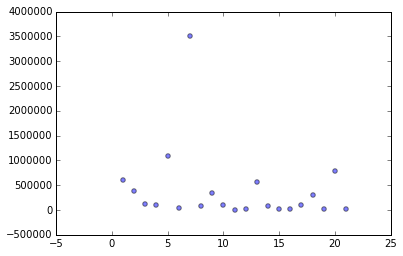

In [2]:
%matplotlib inline

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open("c:/users/kmaull/PycharmProjects/nsf-awards-api/nsf-awards-api/data-explorations/ncar_nsf_2015.json") as fi:
    data = json.loads(fi.read())
    
    award_amounts = pd.DataFrame([int(d['estimatedTotalAmt']) for d in data['response']['award'] if d['awardeeName'] == "University Corporation For Atmospheric Res"])
    
    plt.scatter(range(1,len(award_amounts)+1), award_amounts, alpha=0.5)
    plt.show()

In [3]:
award_amounts.describe()

,0
count,21.000000
mean,395715.428571
std,769993.094219
min,3528.000000
25%,30000.000000
50%,99979.000000
75%,378482.000000
max,3500000.000000


In [6]:
award_amounts.sum()

0    8310024
dtype: int64

So we can see now that of the grants awarded thus far to NCAR _from the NSF_, **that we can find**, we've got 21 total grants, in 2015 totaling some 8.31M, but a median of only 99.98K for 2015 so far.